# Лабораторная работа №2: Моделирование и анализ линейных комбинаций дискретных сигналов

Выполнили студенты гр. 9383 Рыбников Роман и Сергиенкова Анастасия. Вариант №9

## Цель работы

Изучить математическое описание линейных комбинаций дискретных гармонических сигналов и овладеть программными средствами их моделирования.

## Основные теоретические положения

$\bullet \textbf{ Дискретный прямоугольный импульс:}$

$$s(k) = 
\begin{cases}
    \displaystyle U,        & \quad n_0 \leq k \leq n_0 + n_{imp} = 1, k \in \mathbb Z\\
    0  & \quad \text{else}
  \end{cases}$$
  
$\bullet \textbf{ Дискретный гармонический сигнал:}$

$$s(k) = C \cdot cos(\hat w_0k), k \in \mathbb Z$$
  
$\bullet \textbf{ Линейная комбинация дискретных гармонических сигналов:}$

$$s(k) = a_1k_1(k) + a2k_2(k) + a_3x_3(k), k \in \mathbb Z$$

,где

$$x_i(k) = B_i\cdot sin(\hat w_ik), i = 1,2,3,$$


$\bullet \textbf{ Периодический дискретный прямоугольный импульс:}$

$$\displaystyle s(k) = A\cdot \big(-1\big)^{\big\lfloor \frac{2k}{T}\big\rfloor}, k \in \mathbb Z$$

,где $A$ - амплитуда сигнала, $T$ - период сигнала.

## Постановка задачи

С помощью программных средств провести моделирование и анализ линейных комбинацций дискретных гармонических последовательностей. Результаты подкрепить соответствующими графиками и выводами.

## Выполнение работы

## Импорт необходимых библиотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from math import pi, exp

## Исходные данные

In [2]:
# Номер бригады
Nb = 9


# Длина последовательности
N = 30+Nb%5


# Основание экспоненты
a = pow(-1, Nb)*(0.8+0.005*Nb)


# Амплитуда гармонического сигнала
C = 1+Nb%5


# Частота гармоничегоского сигнала
w0 = pi/(6+Nb%5)


# Амплитуда импульса
U = Nb


# Начальный момент импульса
n0 = 3+Nb%5


# Длина импульса
n_imp = 5+Nb%5


# Амплитуды гармонических сигналов
B1 = 1.5+Nb%5
B2 = 5.7-Nb%5
B3 = 2.2+Nb%5


# Частоты гармонических сигналов
w1 = pi/(4+Nb%5)
w2 = pi/(8+Nb%5)
w3 = pi/(16+Nb%5)


# Коэффициенты линейной комбинации гармонических сигналов
a1 = 1.5-Nb%5
a2 = 0.7+Nb%5
a3 = 1.4+Nb%5


x_disc_ = np.linspace(0, N-1, N)
x_disc_5 = np.linspace(0, 5*N-1, 5*N)


y1 = [B1*np.sin(w1*i) for i in range(5*N)]
y2 = [B2*np.sin(w2*i) for i in range(5*N)]
y3 = [B3*np.sin(w3*i) for i in range(5*N)]
y4 = [a1*B1*np.sin(w1*i)+a2*B2*np.sin(w2*i)+a3*B3*np.sin(w3*i)
      for i in range(5*N)]


def rect_imp(x, _m=n0):
    y = np.zeros(x.shape)
    y[(_m <= x) & (x <= _m + n_imp - 1)] = U
    return y


def x1(k):
    return B1*np.sin(w1*k)


def x2(k):
    return B2*np.sin(w2*k)


def x3(k):
    return B3*np.sin(w3*k)


def s2(k):
    return a1*x1(k)+a2*x2(k)+a3*x3(k)


s3 = [C*(pow(abs(a), i))*np.cos(w0*i) for i in range(N)]
s4 = np.linspace(0, (n_imp*5*2)-1, n_imp*5*2)


dpi = 600
fs = (12, 5)

## Пункт 1

Смоделировать дискретный прямоугольный импульс:

$$s_1(k) = 
\begin{cases}
    \displaystyle U,       & \quad n_0 \leq k \leq n_0 + n_{imp} = 1\\
    0  & \quad \text{else}
  \end{cases}$$
  
на основе дискретного единичного скачка $\sigma_d(k)$ из л/р №1 с выводом графика на интервале времени $n \in \big[0, N-1\big]$. Пояснить как выполняется моделирование импульса.

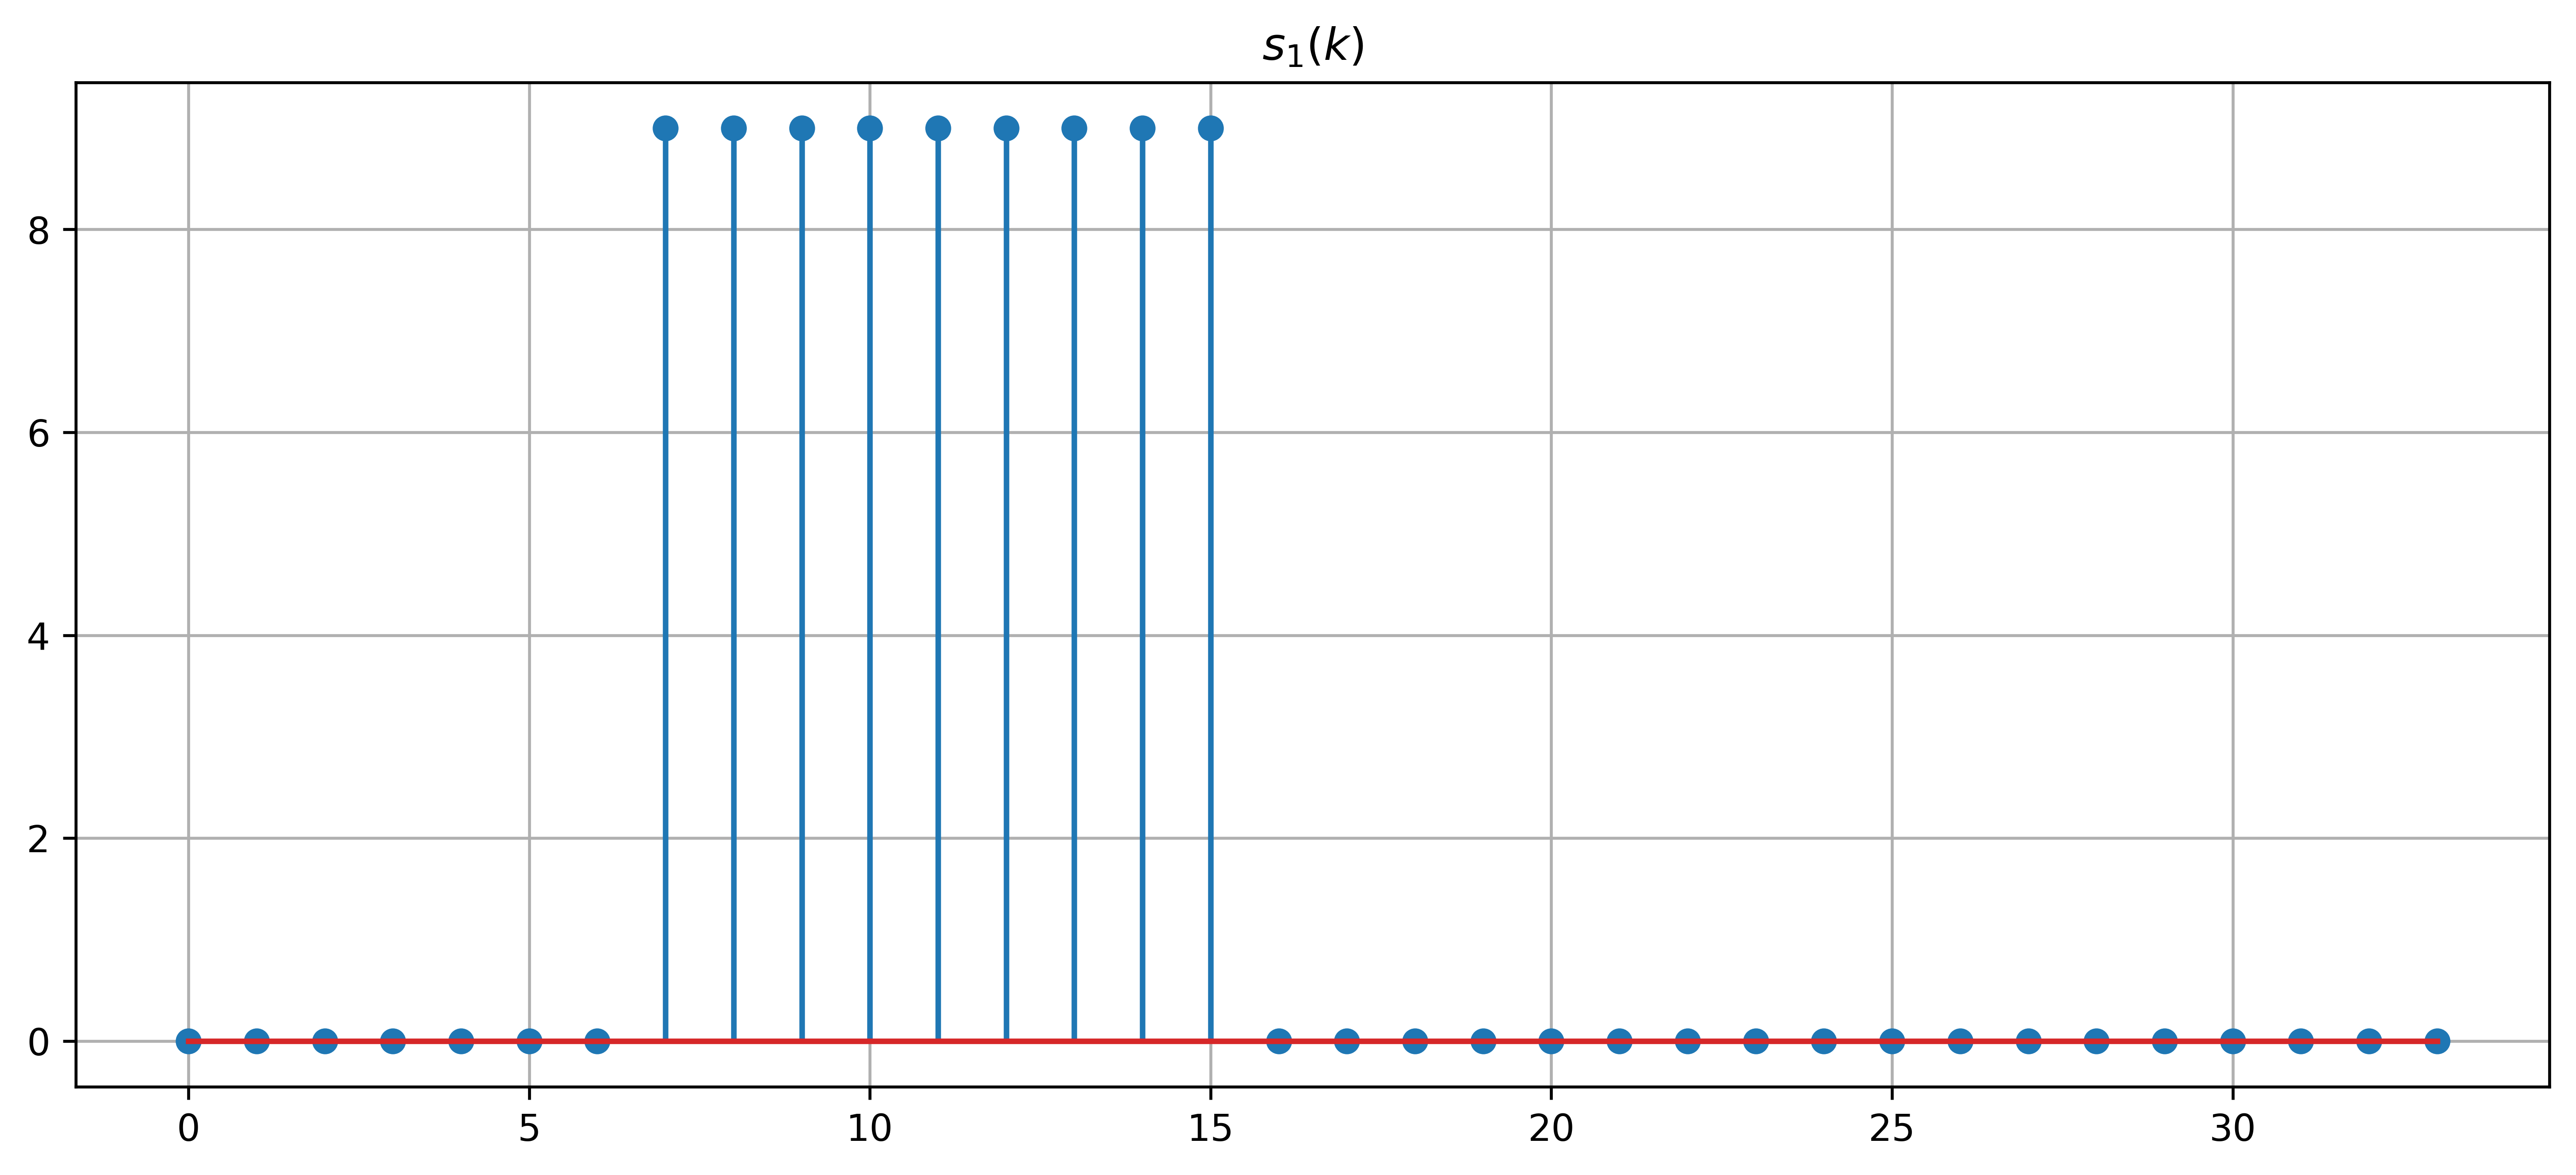

In [3]:
plt.figure(dpi=dpi, figsize=fs)
plt.stem(x_disc_, rect_imp(x_disc_))
plt.title(r"$s_1(k)$")
plt.grid()
plt.show()

$\bullet$ Для моделирования прямоугольного импульса сначала генерируется массив нулей размера равному количеству элементов соответствующему интервалу времени, затем каждому элементу массива, удовлетворяющему условию, присваивается $U$.

## Пункт 2

Смоделировать линейную комбинацию дискретных гармонических сигналов $s_2(k):$

$$s_2(k) = a_1k_1(k) + a2k_2(k) + a_3x_3(k),$$

где

$$x_i(k) = B_i\cdot sin(\hat w_ik), i = 1,2,3,$$

с выводом графиков последовательностей $x_i(k)$ и $s_2(k)$ на интервале времени $n \in \big[0, 5N-1\big]$. Вычислить среднее значение (идентификатор $\mu_{s2}$), энергию (идентификатор $E$) и среднюю мощность последовательности $s_2(k)$ (идентификатор $P$). Пояснить:

   1. операции при моделировании линейной комбинации сигналов $s_2(k)$;
   2. как определяют указанные характеристики.

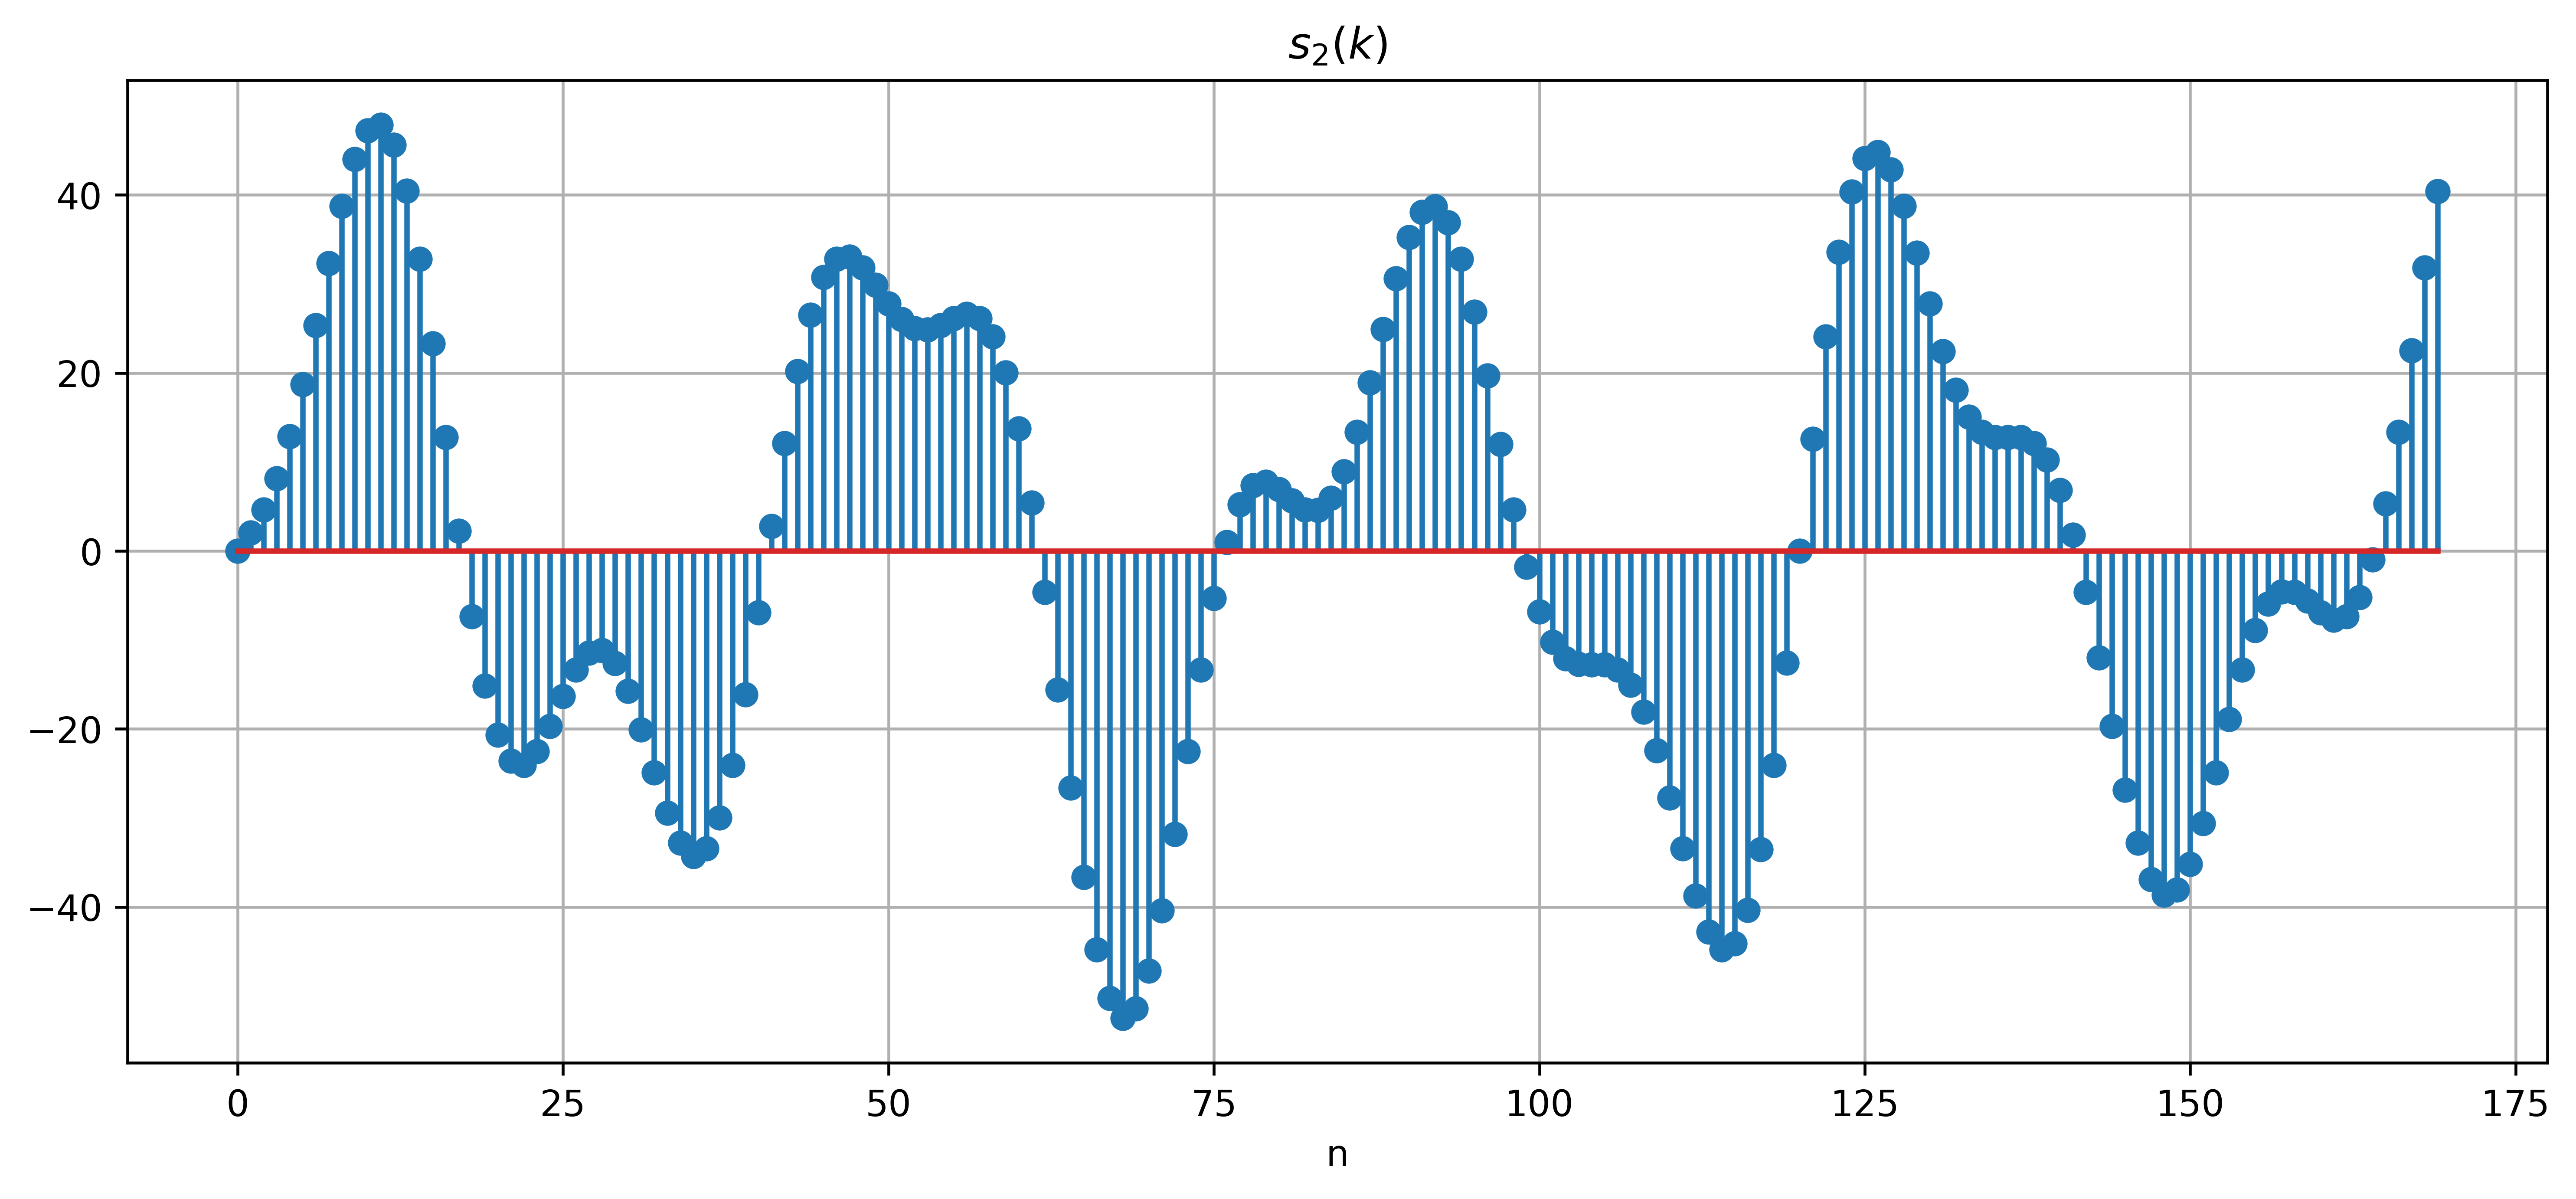

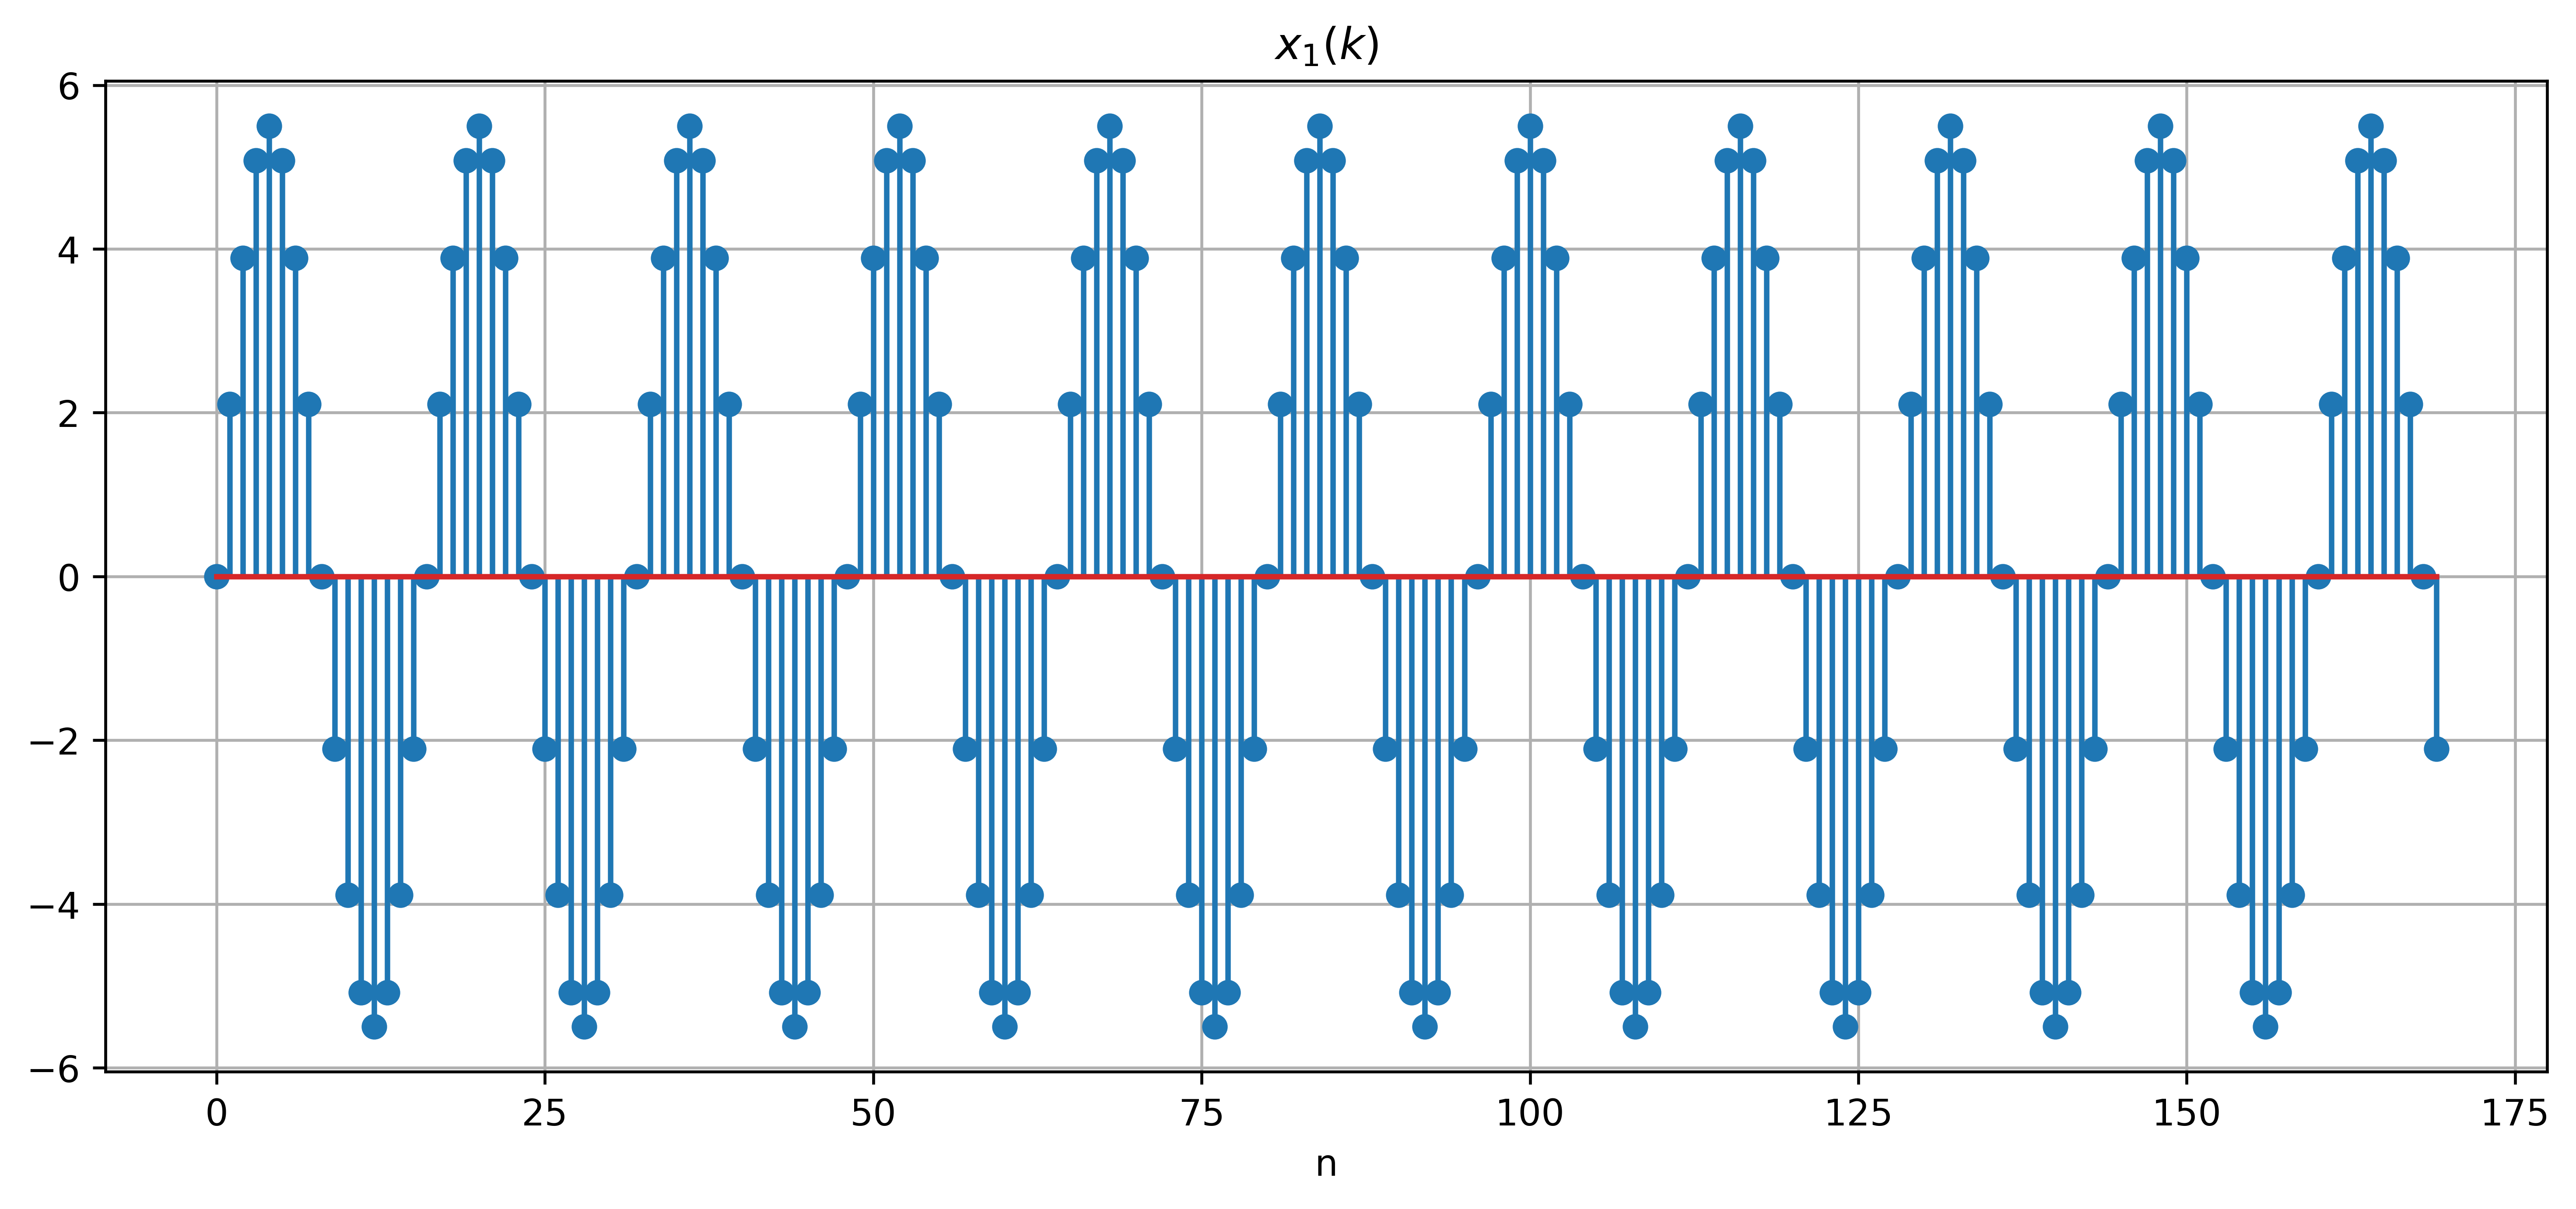

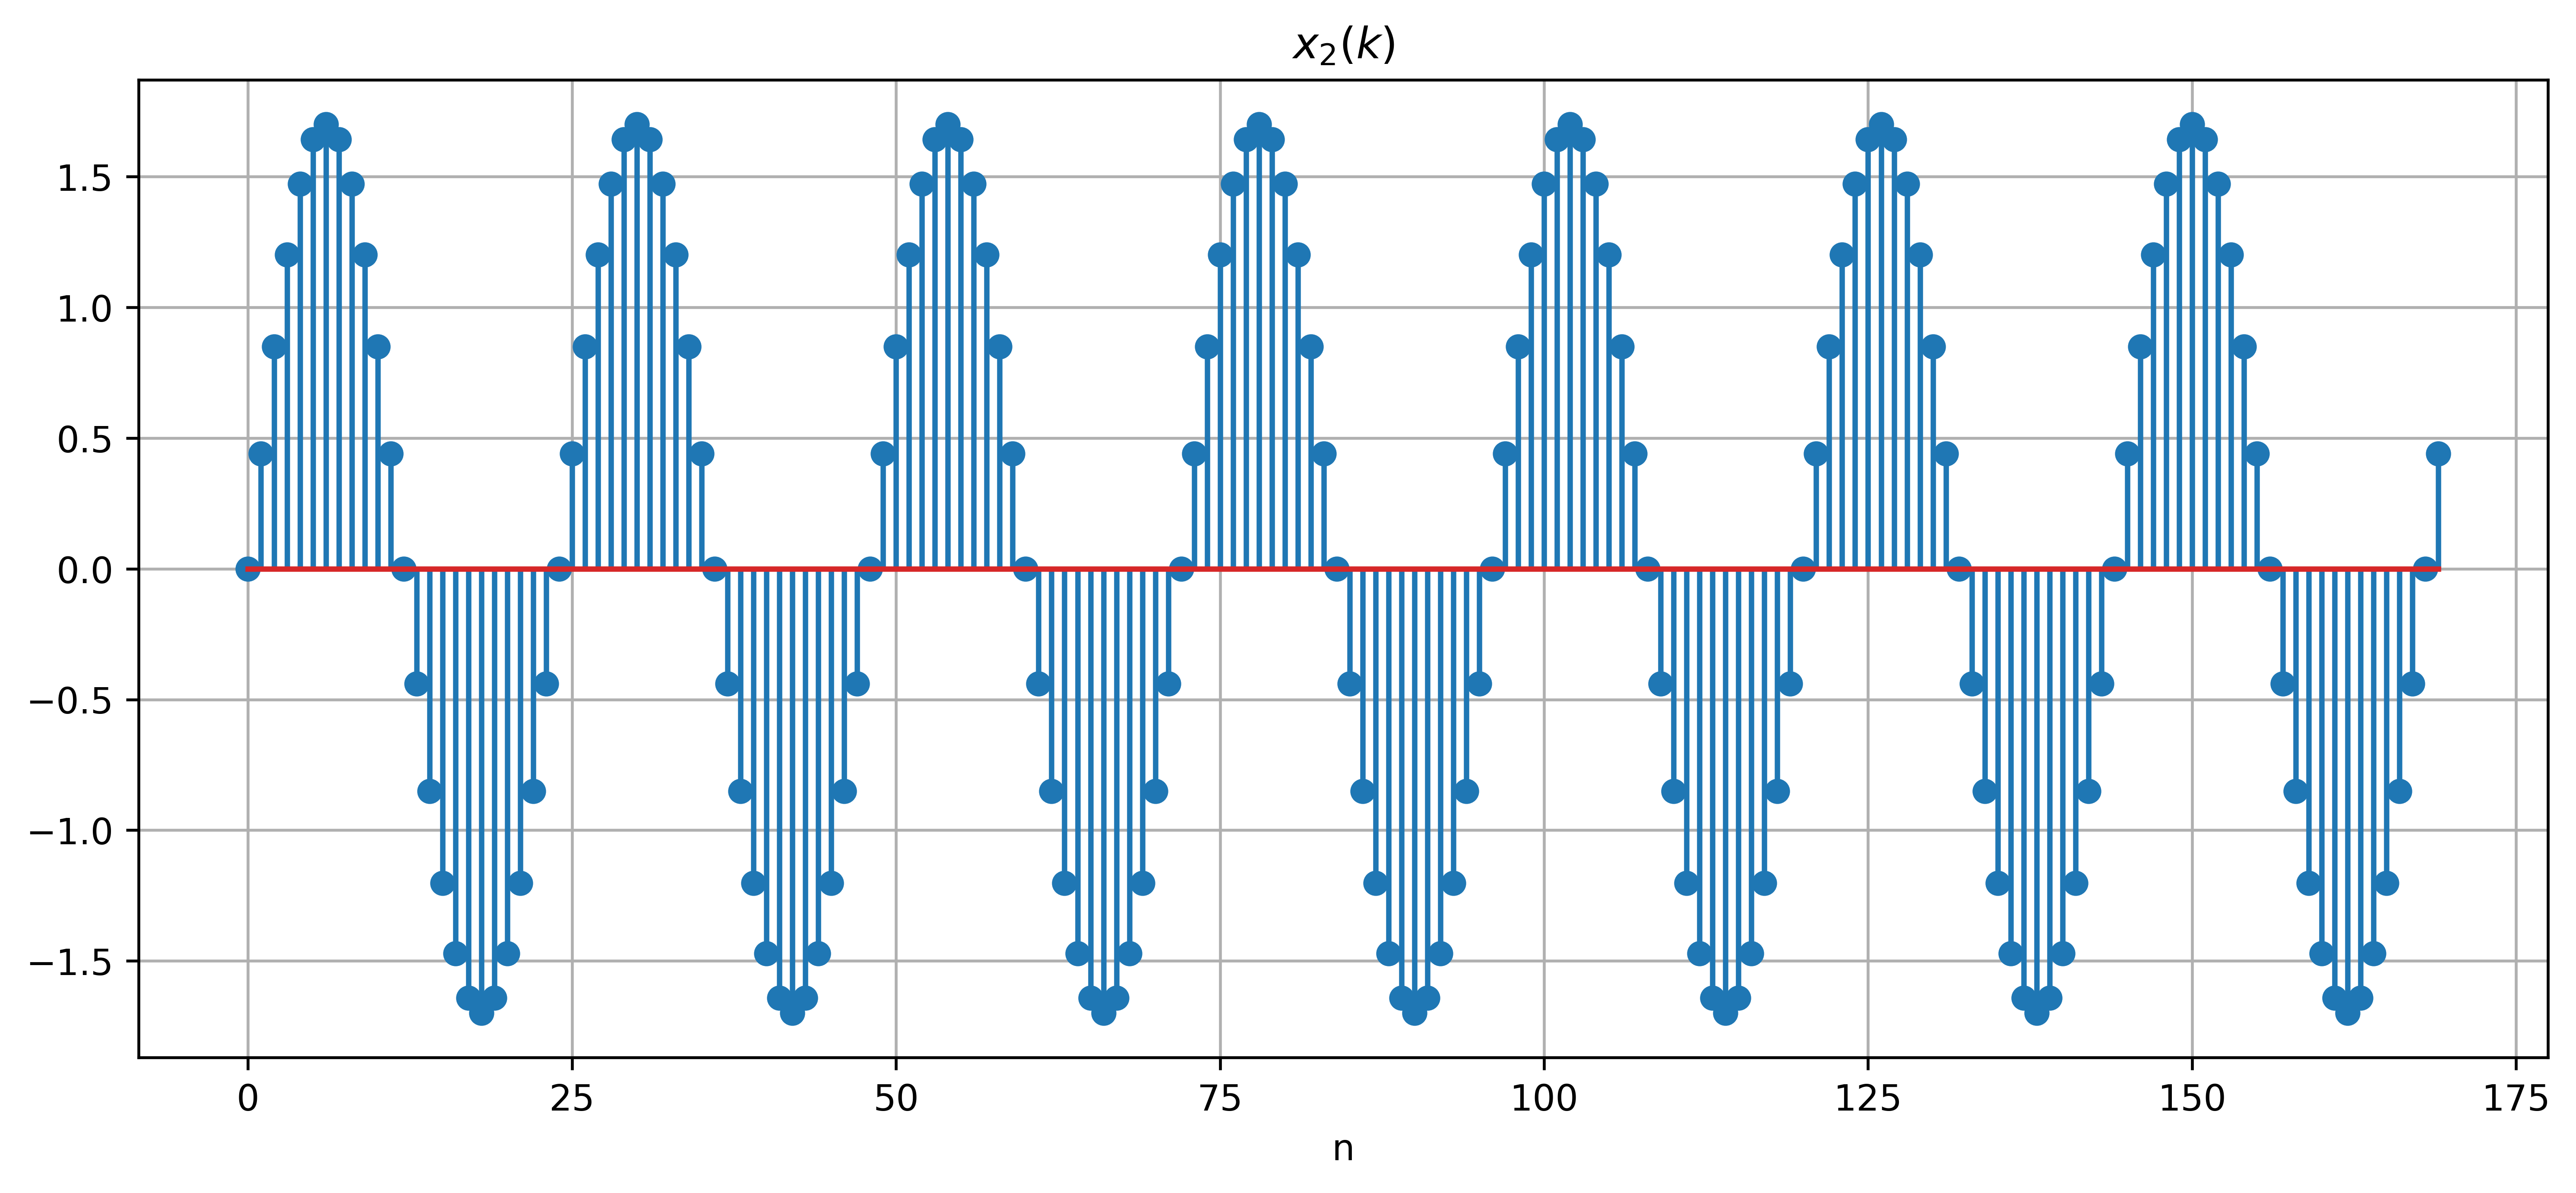

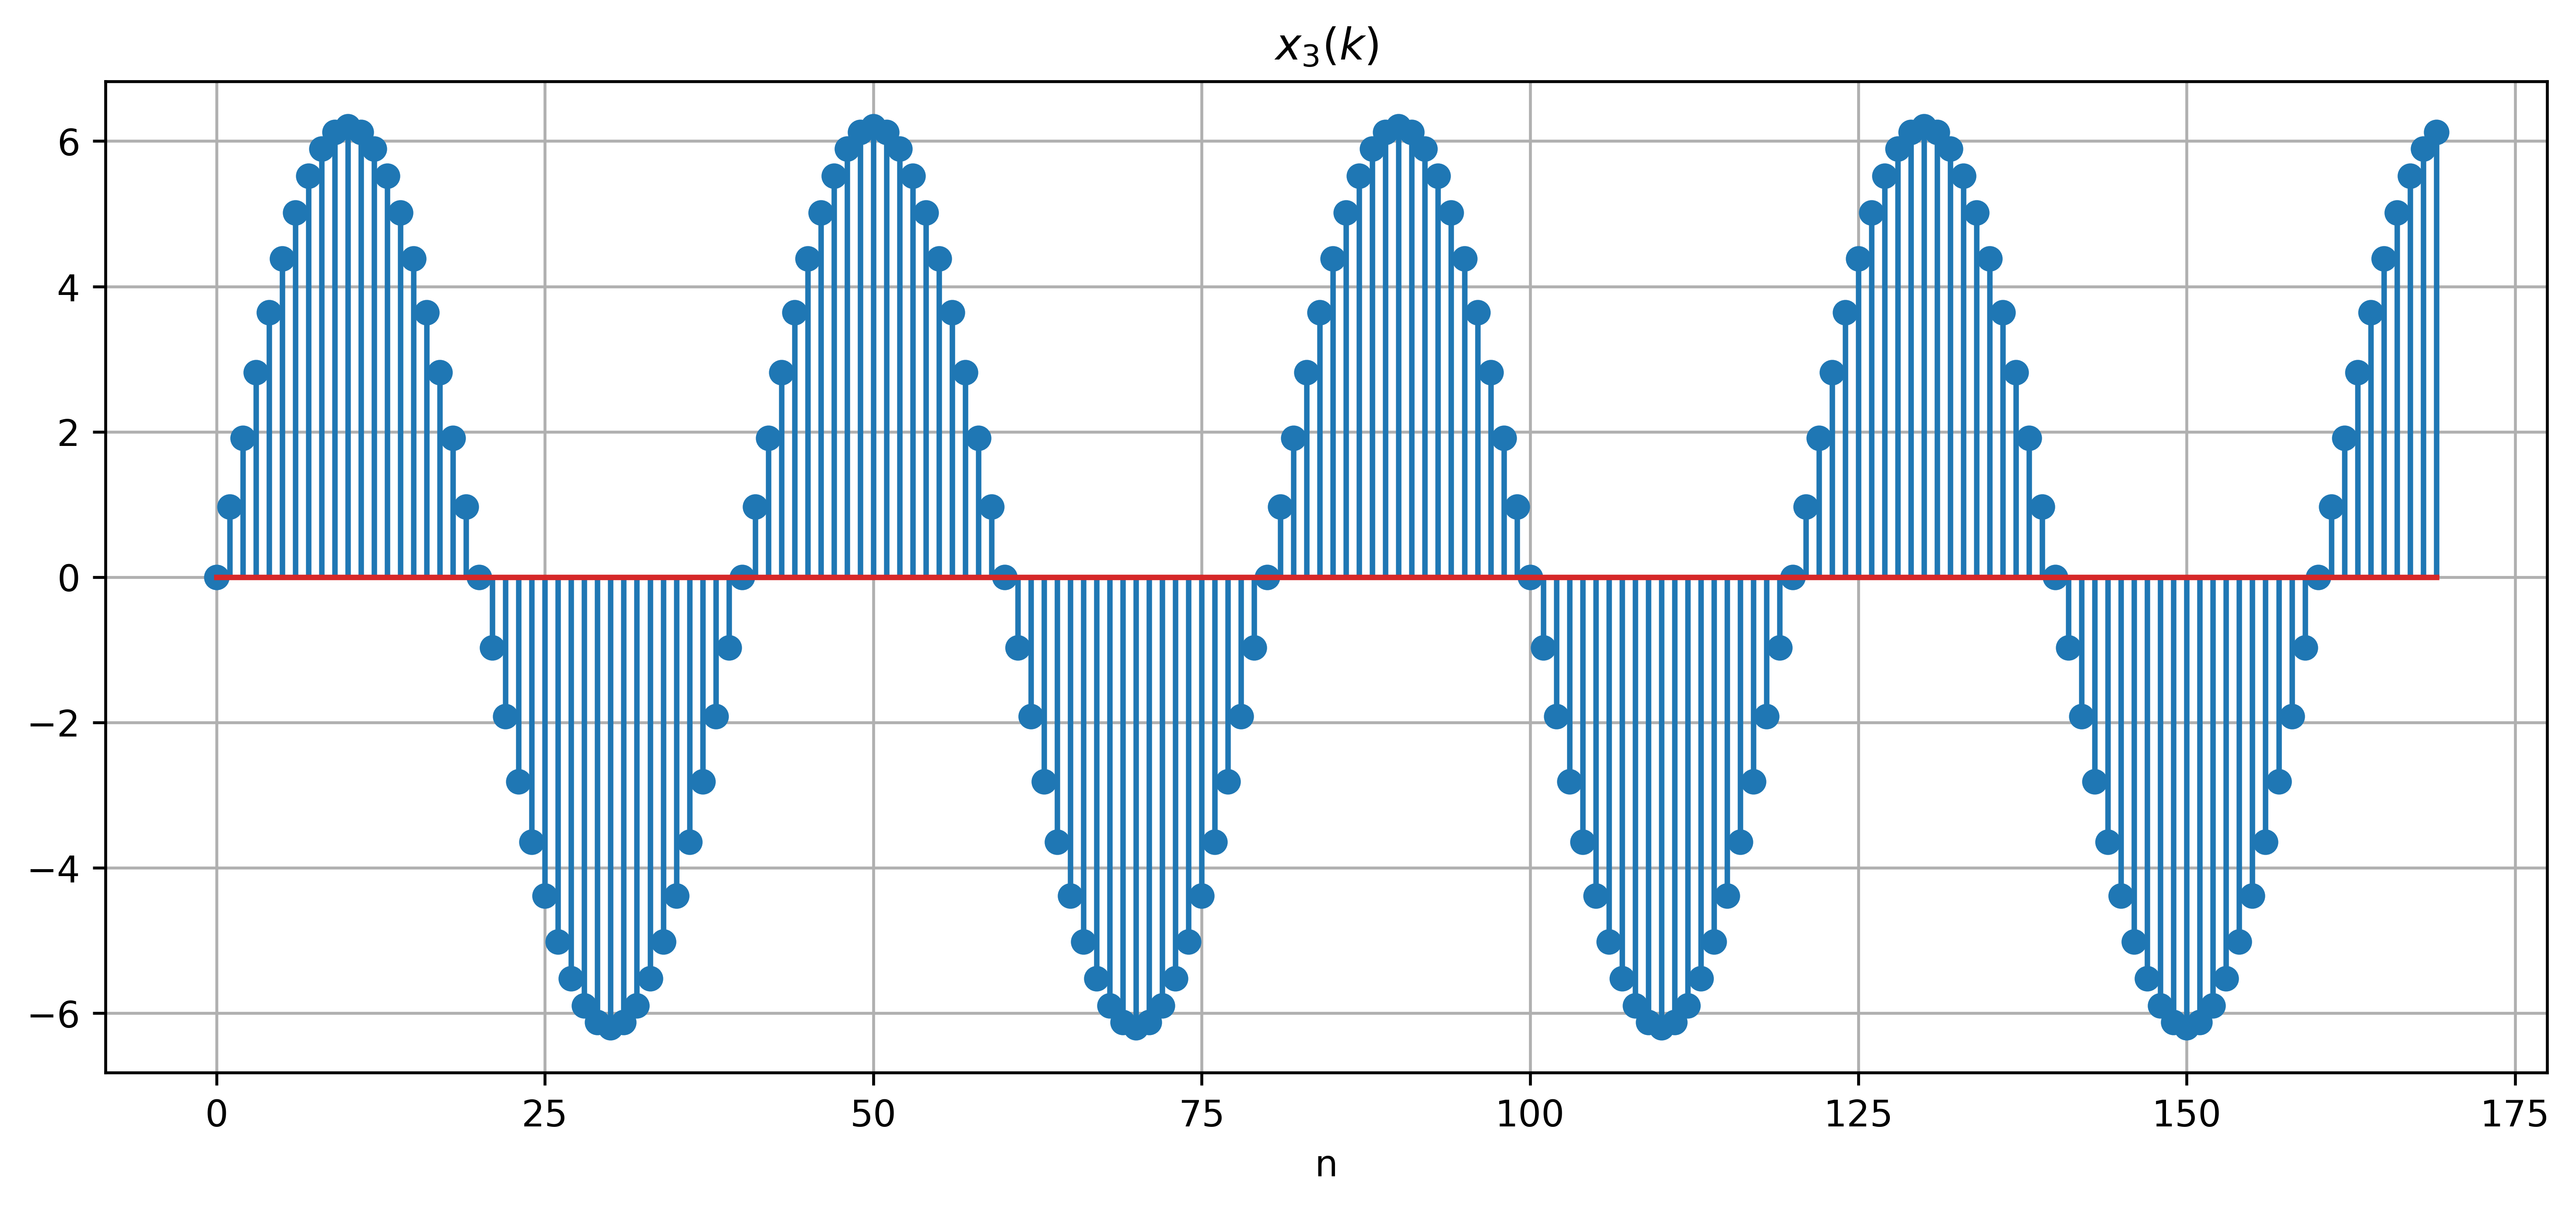

In [4]:
plt.figure(dpi=dpi, figsize=fs)
plt.stem(x_disc_5, s2(x_disc_5))
plt.title(r"$s_2(k)$")
plt.xlabel("n")
plt.grid()
plt.show()

plt.figure(dpi=dpi, figsize=fs)
plt.stem(x_disc_5, x1(x_disc_5))
plt.title(r"$x_1(k)$")
plt.xlabel("n")
plt.grid()
plt.show()

plt.figure(dpi=dpi, figsize=fs)
plt.stem(x_disc_5, x2(x_disc_5))
plt.title(r"$x_2(k)$")
plt.xlabel("n")
plt.grid()
plt.show()

plt.figure(dpi=dpi, figsize=fs)
plt.stem(x_disc_5, x3(x_disc_5))
plt.title(r"$x_3(k)$")
plt.xlabel("n")
plt.grid()
plt.show()

In [5]:
s2_mean = np.mean(y4)
s2_energy = np.sum(np.power(y4, 2))
s2_power = s2_energy/len(y4)

print(f"Среднее значение: {s2_mean}")
print(f"Энергия: {s2_energy}")
print(f"Мощность: {s2_power}")

Среднее значение: 0.7892106507777831
Энергия: 110847.78920679263
Мощность: 652.045818863486


$\bullet$ Операции при моделировании линейной комбинации сигналов $s_2(k)$:

1. Вычисление дискретного нормированного времени
2. Вычисление матрицы дискретных гармоник
3. Линейная комбинация дискретных гармоник

$\bullet$ Формулы определения характеристик:

$$\displaystyle \mu_{s2} = \frac{1}{N}\sum_{i=0}^{N-1} x_i$$

$$\displaystyle E = \int_0^T s^2(t)\; \mathrm{d}t$$

$$\displaystyle P = \frac{1}{T}\int_0^T s^2(t)\; \mathrm{d}t$$

## Пункт 3

Вывести график дискретного сигнала $s_3(k)$ представляющего собой дискретный гармонический сигнал $s(k)$

$$s_3(k) = |a|^k \cdot C\cdot cos(\hat w_0k)$$

с экспоненциальной огибающей $|a|^k$, на интервале времени $n \in \big[0, N-1\big]$. Привести аналитическую формулу дискретного $s_3(k)$ и пояснить операции при его моделировании.

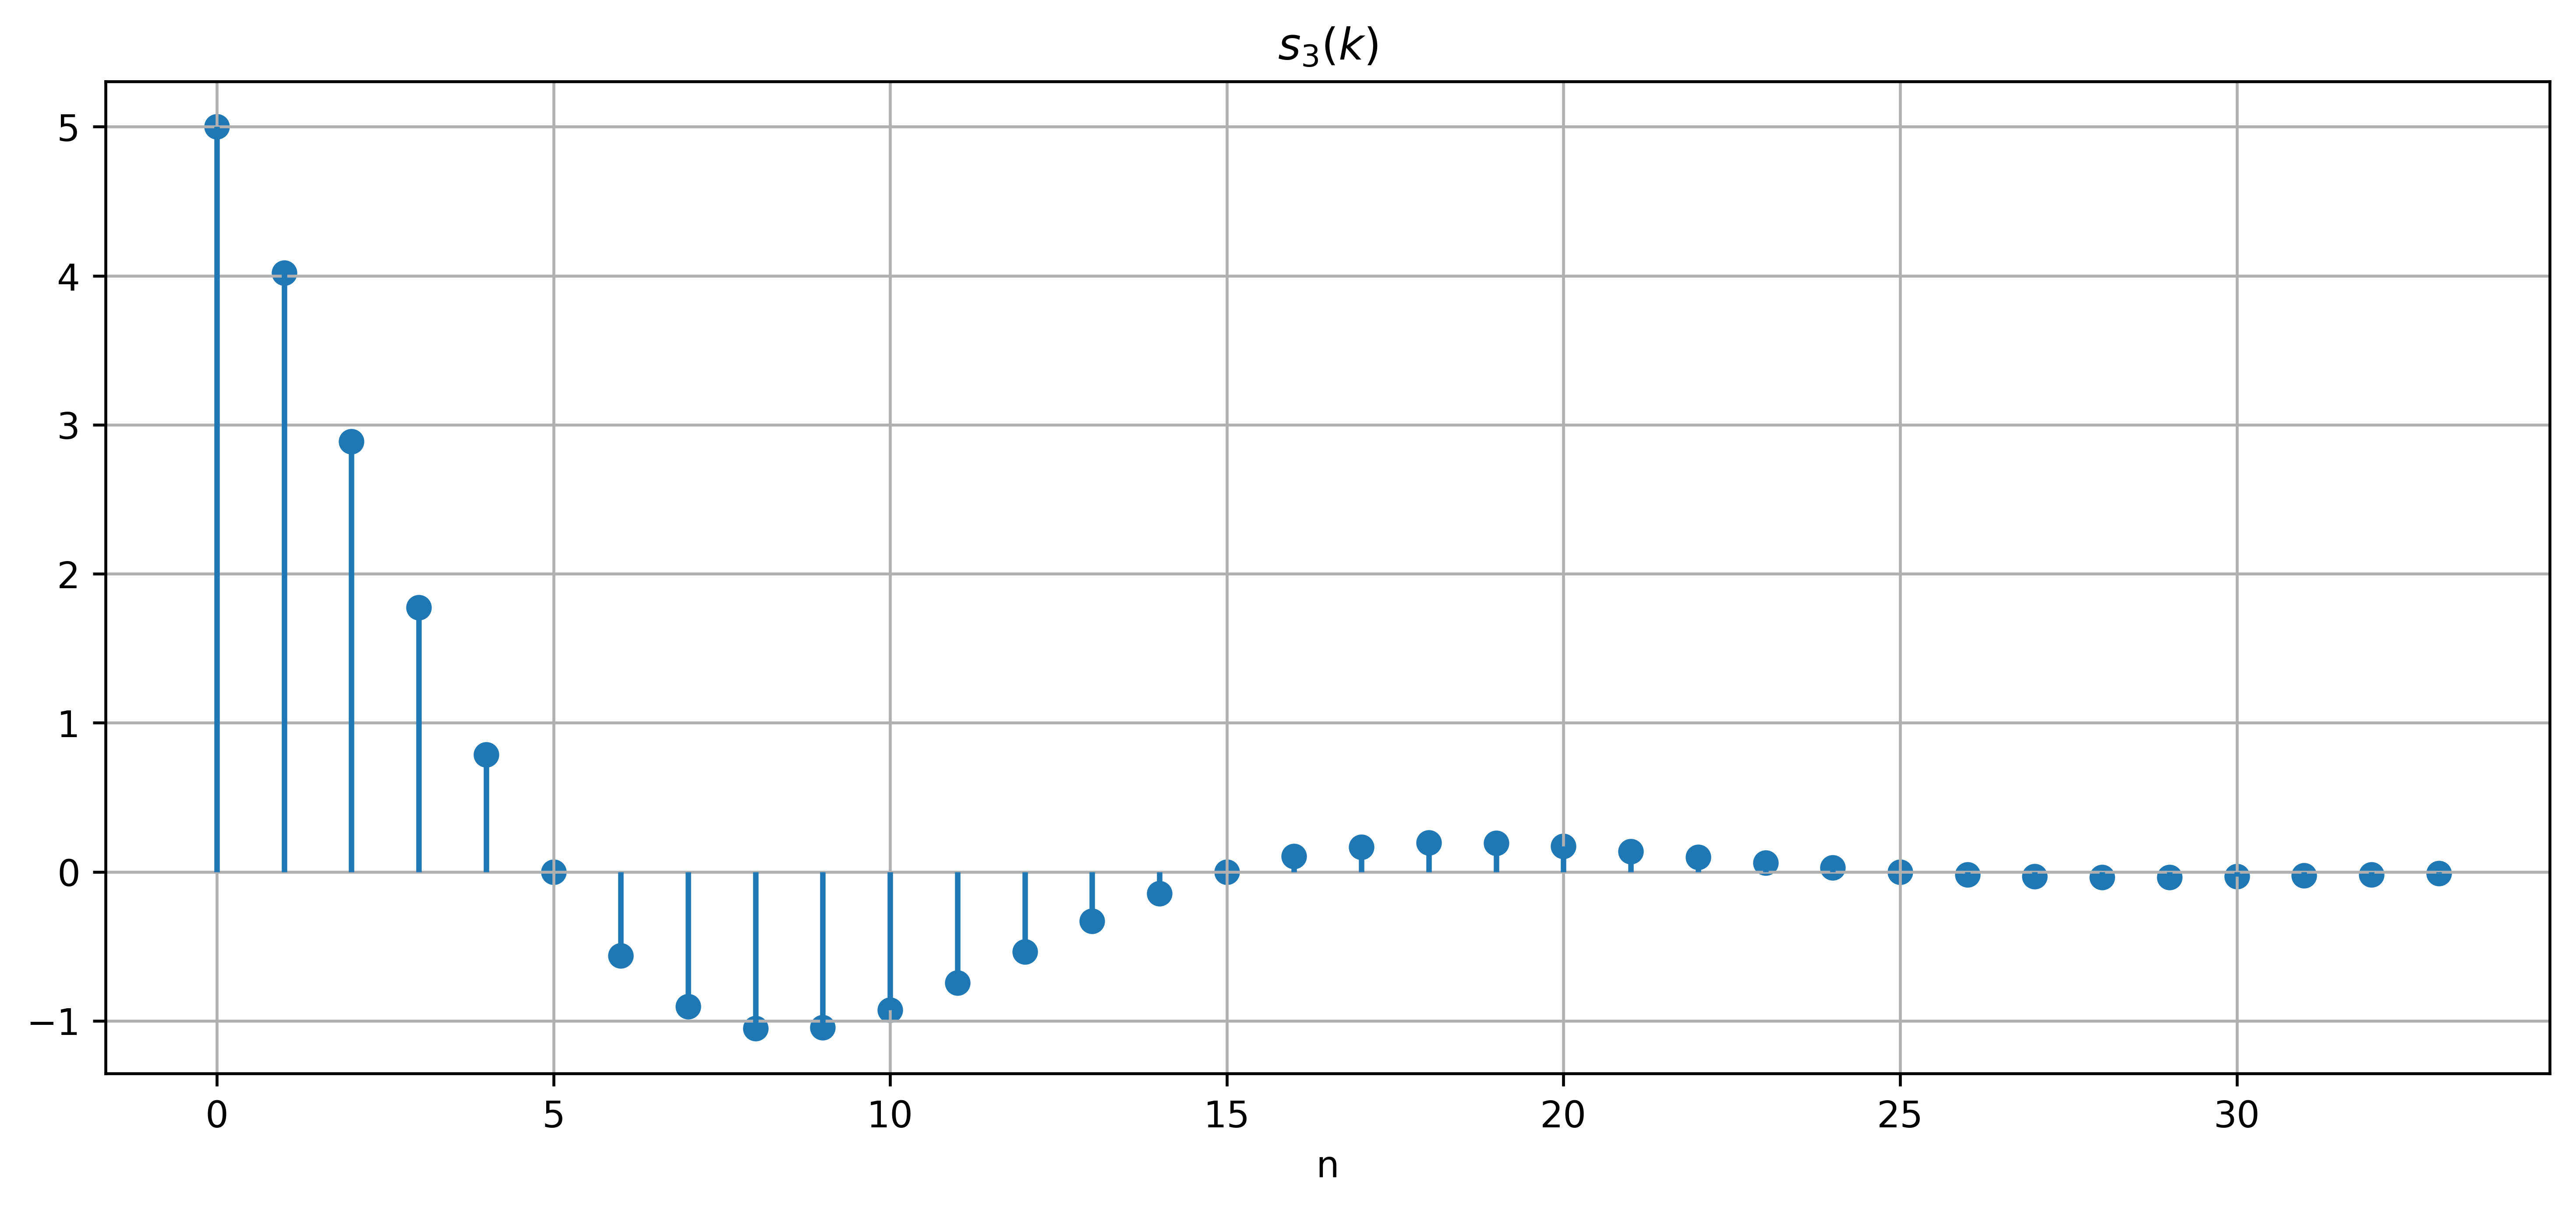

In [6]:
plt.figure(dpi=dpi, figsize=fs)
plt.scatter(x_disc_, s3)
plt.vlines(x_disc_, ymin=0, ymax=s3)
plt.title(r'$s_3(k)$')
plt.xlabel("n")
plt.grid()
plt.show()

## Пункт 4

Вывести график пяти периодов периодической последовательности $s_4(k)$ дискретных прямоугольных импульсов амплитуды $U$ и длительности $n_{imp}$ с периодом, вдвое большим длительности импульса. Пояснить операции при моделировании периодической последовательности.

$$\displaystyle s_4(k) = \frac{U}{2} \cdot \big(-1\big)^{\frac{2k}{2\cdot n_{imp}}}+\frac{U}{2}$$

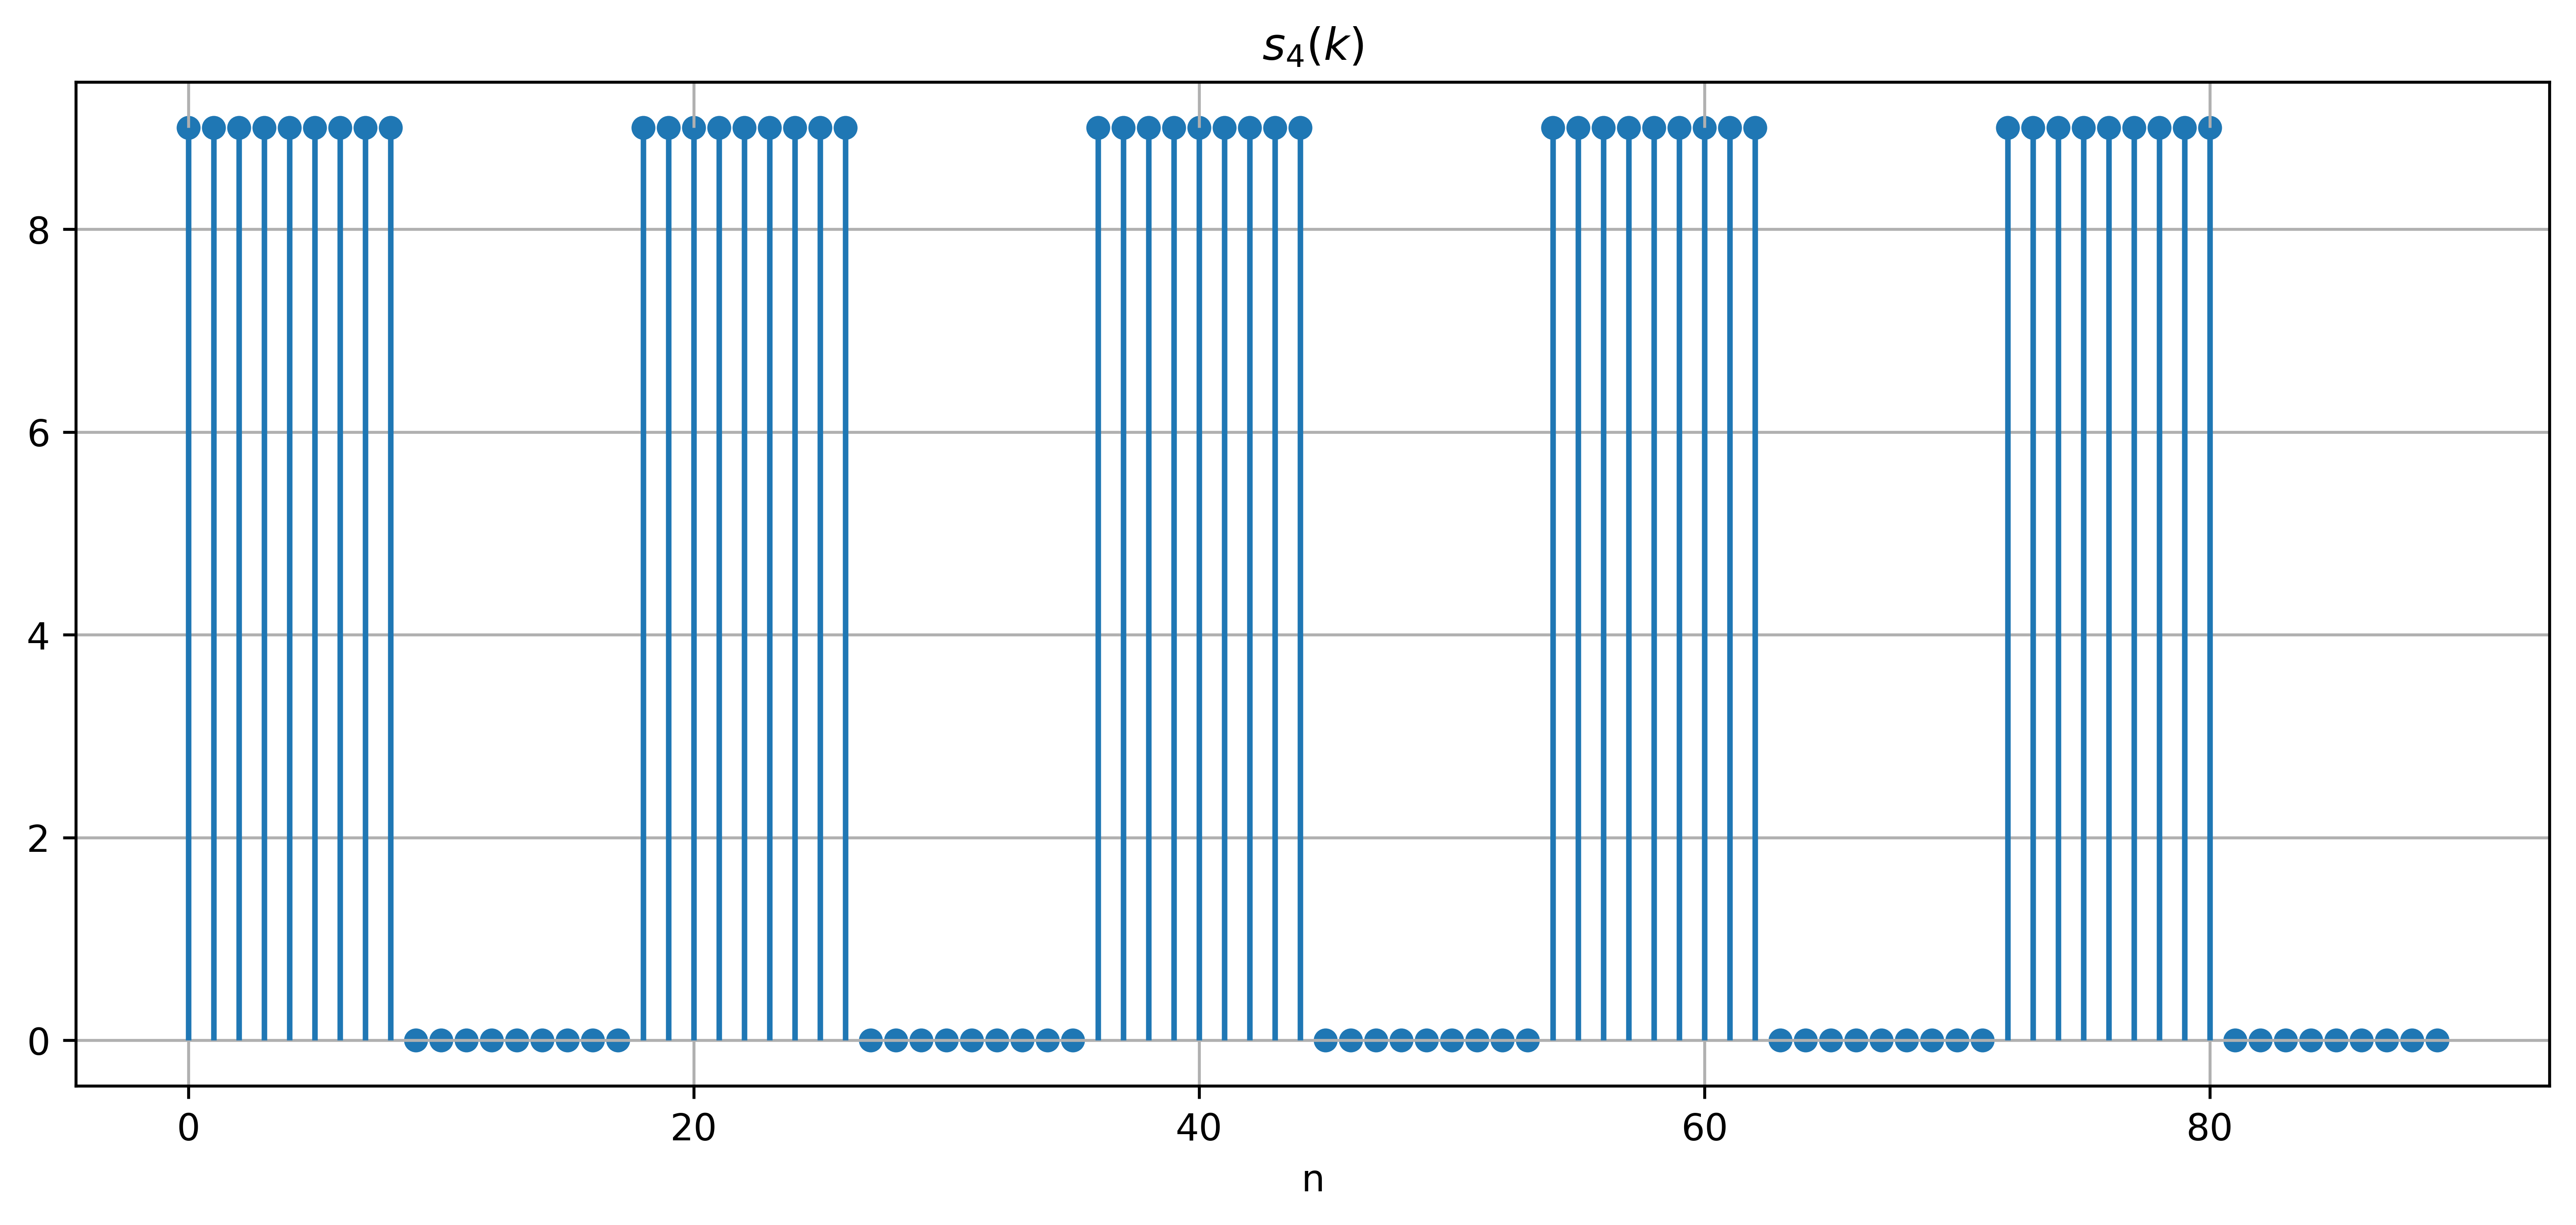

In [7]:
y = np.zeros(shape=s4.shape)

for i in range(5):
    y += rect_imp(s4, 2*n_imp*i)

plt.figure(dpi=dpi, figsize=fs)
plt.scatter(s4, y, s=30)
plt.vlines(s4, ymin=0, ymax=y)
plt.title(r'$s_4(k)$')
plt.xlabel("n")
plt.grid()
plt.show()

## Выводы

В ходе выполнения лабораторной рабы было изученно математическое описание линейных комбинаций дискретных гармонических сигналов и получены навыки работы с программными средствами их моделирования 